In [316]:
## 3 observations at the end##

In [317]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ride_data_pd = pd.read_csv("ride_data.csv")
ride_data_pd.head()




,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [318]:
# example of how you make a copy of a dataframe using pandas
# new = old[['A', 'C', 'D']].copy()

#makes copy of original data frame to use for avg fare per city with only city and fare
# city_fare_only = ride_data_pd[["city", "fare"]].copy(deep = True)
# city_fare_only.head()

#uses the original data frame to calc the avg fare per city
avg_city_fare = ride_data_pd.groupby(["city"]).mean()["fare"]
avg_city_fare.head()

city
Alvarezhaven    23.928710
Alyssaberg      20.609615
Anitamouth      37.315556
Antoniomouth    23.625000
Aprilchester    21.981579
Name: fare, dtype: float64

In [319]:
#uses the copy of the dataframe from abover to get avg fare per city
# avg_city_fare = city_fare_only.groupby(["city"]).mean()["fare"]
# avg_city_fare.head()


In [320]:
# Total Number of Rides Per City
total_city_rides = ride_data_pd.groupby(["city"]).count()["fare"]
total_city_rides.head()

city
Alvarezhaven    31
Alyssaberg      26
Anitamouth       9
Antoniomouth    22
Aprilchester    19
Name: fare, dtype: int64

In [321]:
# Importing city_data.csv
city_data_pd = pd.read_csv("city_data.csv")
city_data_pd.head()
type(city_data_pd)


pandas.core.frame.DataFrame

In [322]:
# Total Number of Drivers Per City
total_city_drivers = city_data_pd.groupby(["city"]).sum()["driver_count"]
total_city_drivers.head()

city
Alvarezhaven    21
Alyssaberg      67
Anitamouth      16
Antoniomouth    21
Aprilchester    49
Name: driver_count, dtype: int64

In [323]:
# #city type per city
# # Total Number of Drivers Per City
# type_per_city_df = city_data_pd.groupby(["city"])
# type_per_city_df.head()
# type(type_per_city_df)

In [324]:
#make new data frame with 3 columns: 3 key variables from above
pyber_city_variables_df = pd.DataFrame({"Avg Fare per City": avg_city_fare,
                                  "Total # of Rides": total_city_rides,
                                  "Total Drivers per City": total_city_drivers})

pyber_city_variables_df.head()
# type(pyber_city_variables_df)

##we're gonna have to merge a city type table and the pyber comparison table since I can't pull the right 
##...data point into city type. I keep pulling in (city_name, [city]) into the list from the groupby if I do not function

,Avg Fare per City,Total # of Rides,Total Drivers per City
city,,,
Alvarezhaven,23.928710,31,21
Alyssaberg,20.609615,26,67
Anitamouth,37.315556,9,16
Antoniomouth,23.625000,22,21
Aprilchester,21.981579,19,49


In [325]:
##place index as a column
pyber_city_variables_df['city'] = pyber_city_variables_df.index
# pyber_city_variables_df.head()

pyber_city_variables_df = pyber_city_variables_df[['city', 'Avg Fare per City', 'Total # of Rides', 'Total Drivers per City']]
pyber_city_variables_df.head()

,city,Avg Fare per City,Total # of Rides,Total Drivers per City
city,,,,
Alvarezhaven,Alvarezhaven,23.928710,31,21
Alyssaberg,Alyssaberg,20.609615,26,67
Anitamouth,Anitamouth,37.315556,9,16
Antoniomouth,Antoniomouth,23.625000,22,21
Aprilchester,Aprilchester,21.981579,19,49


In [326]:
#resetting the index to have it merge with my other table. Would keep erroring if I kept index as city.
new_df = pyber_city_variables_df.reset_index(drop=True)
new_df.head()

,city,Avg Fare per City,Total # of Rides,Total Drivers per City
0,Alvarezhaven,23.928710,31,21
1,Alyssaberg,20.609615,26,67
2,Anitamouth,37.315556,9,16
3,Antoniomouth,23.625000,22,21
4,Aprilchester,21.981579,19,49


In [327]:
##join the 2 tables "new_df" and original city_data_pd
city_plus_type_df = pd.merge(new_df, city_data_pd, on = "city")
city_plus_type_df.head()

,city,Avg Fare per City,Total # of Rides,Total Drivers per City,driver_count,type
0,Alvarezhaven,23.928710,31,21,21,Urban
1,Alyssaberg,20.609615,26,67,67,Urban
2,Anitamouth,37.315556,9,16,16,Suburban
3,Antoniomouth,23.625000,22,21,21,Urban
4,Aprilchester,21.981579,19,49,49,Urban


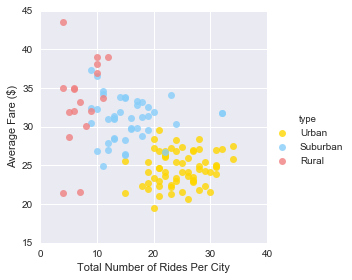

In [406]:
##using seaborn for the plot. Can't get my bubbles to change shape though
sns.lmplot(x='Total # of Rides', y='Avg Fare per City', data=city_plus_type_df, fit_reg=False, size=4, aspect=1, hue='type', palette=dict(Urban="Gold", Suburban="lightskyblue", Rural="lightcoral"))   # Color by evolution stage)
# Tweak using Matplotlib
plt.xlim(0, 40)
plt.ylim(15, 45)
xlabel('Total Number of Rides Per City')
ylabel('Average Fare ($)')

show()

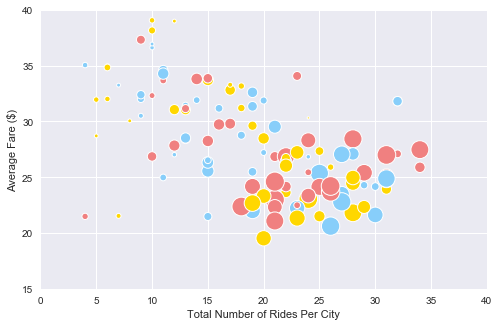

In [411]:
### This is using straight matplotlib and pyplot alowwing me to change bubble size!
#BUT bubble colors won't correlate to correct city_type like above.

fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

colors = ["Gold", "lightskyblue", "lightcoral"]
# colors = [Urban="Gold", Suburban="lightskyblue", Rural="lightcoral"]
ax.scatter(city_plus_type_df['Total # of Rides'], city_plus_type_df['Avg Fare per City'],c=colors, s=city_plus_type_df['Total Drivers per City']*5, linewidths=-1, edgecolor='w')

# # Create a legend
# lgnd = plt.legend(city_plus_type_df['type'],fontsize="small", mode="Expanded", 
#                   numpoints=3, scatterpoints=1, 
#                   loc="best", title="City Types", 
#                   labelspacing=0.5)

plt.xlim(0,40)
plt.ylim(15, 40)
xlabel('Total Number of Rides Per City')
ylabel('Average Fare ($)')


plt.show()

In [330]:
##just for viewing purposes
city_plus_type_df.head()

,city,Avg Fare per City,Total # of Rides,Total Drivers per City,driver_count,type
0,Alvarezhaven,23.928710,31,21,21,Urban
1,Alyssaberg,20.609615,26,67,67,Urban
2,Anitamouth,37.315556,9,16,16,Suburban
3,Antoniomouth,23.625000,22,21,21,Urban
4,Aprilchester,21.981579,19,49,49,Urban


In [331]:
## percent of Total Rides by City Type
total_rides_city_type = city_plus_type_df.groupby(["type"]).sum()["Total # of Rides"]/(sum([city_plus_type_df["Total # of Rides"]]))*100
total_rides_city_type.head()


type
Rural        5.193187
Suburban    27.295388
Urban       67.511425
Name: Total # of Rides, dtype: float64

In [332]:
## percent of Total Fares by City Type
total_drivers_city_type = city_plus_type_df.groupby(["type"]).sum()["Total Drivers per City"]/(sum([city_plus_type_df["Total Drivers per City"]]))*100
total_drivers_city_type.head()

type
Rural        3.088803
Suburban    19.483219
Urban       77.427977
Name: Total Drivers per City, dtype: float64

In [333]:
## percent of Total Drivers by City Type
##going to have to get original table with fares and group them by type and get 
#uses the original data frame to calc the avg fare per city
fare_per_city = ride_data_pd.groupby(["city"]).sum()["fare"]
type(percent_drivers_type)

#make new data frame
fare_per_city = pd.DataFrame({"total fare per city": fare_per_city})
fare_per_city.head()

,total fare per city
city,
Alvarezhaven,741.79
Alyssaberg,535.85
Anitamouth,335.84
Antoniomouth,519.75
Aprilchester,417.65


In [334]:
##place index as a column
fare_per_city['city'] = fare_per_city.index
fare_per_city.head()

,total fare per city,city
city,,
Alvarezhaven,741.79,Alvarezhaven
Alyssaberg,535.85,Alyssaberg
Anitamouth,335.84,Anitamouth
Antoniomouth,519.75,Antoniomouth
Aprilchester,417.65,Aprilchester


In [335]:
#resetting the index to have it merge with my other table.
fare_per_city = fare_per_city.reset_index(drop=True)
fare_per_city.head()

fare_per_city = fare_per_city[['city', 'total fare per city']]
fare_per_city.head()

,city,total fare per city
0,Alvarezhaven,741.79
1,Alyssaberg,535.85
2,Anitamouth,335.84
3,Antoniomouth,519.75
4,Aprilchester,417.65


In [336]:
## make dataframe with the other 2 datapoints then merge with 'city_plus_type_df'. then calculate % total fares by city type
##then create new dataframe with those 3 values and do your pie charts

# #adds total fare per city column
# city_plus_type_df['total fare per city'] = fare_per_city['total fare per city']
# city_plus_type_df.head()

#merges tables per city which is probably better than just adding a column
city_plus_type_df = pd.merge(city_plus_type_df, fare_per_city, on = "city")
city_plus_type_df.head()


,city,Avg Fare per City,Total # of Rides,Total Drivers per City,driver_count,type,total fare per city
0,Alvarezhaven,23.928710,31,21,21,Urban,741.79
1,Alyssaberg,20.609615,26,67,67,Urban,535.85
2,Anitamouth,37.315556,9,16,16,Suburban,335.84
3,Antoniomouth,23.625000,22,21,21,Urban,519.75
4,Aprilchester,21.981579,19,49,49,Urban,417.65


In [337]:
total_fare_city_type = city_plus_type_df.groupby(["type"]).sum()["total fare per city"]/(sum([city_plus_type_df["total fare per city"]]))*100
total_fare_city_type.head()

type
Rural        6.579786
Suburban    31.445750
Urban       61.974463
Name: total fare per city, dtype: float64

In [338]:
##make new dataframe for pie charts with rural, suburban and urban 
pyber_city_type_variables = pd.DataFrame({"% Total Fares": total_fare_city_type,
                                  "% Total Rides by City Type": total_rides_city_type,
                                  "% Total Drivers by City Type": total_drivers_city_type})

pyber_city_type_variables.head()

,% Total Drivers by City Type,% Total Fares,% Total Rides by City Type
type,,,
Rural,3.088803,6.579786,5.193187
Suburban,19.483219,31.445750,27.295388
Urban,77.427977,61.974463,67.511425


In [339]:
##turn the index to zero and move the current index "type" to a column. If I change drop to False I don't have to rearrange columns
pyber_city_type_variables = pyber_city_type_variables.reset_index(drop=False)
pyber_city_type_variables.head()

,type,% Total Drivers by City Type,% Total Fares,% Total Rides by City Type
0,Rural,3.088803,6.579786,5.193187
1,Suburban,19.483219,31.445750,27.295388
2,Urban,77.427977,61.974463,67.511425


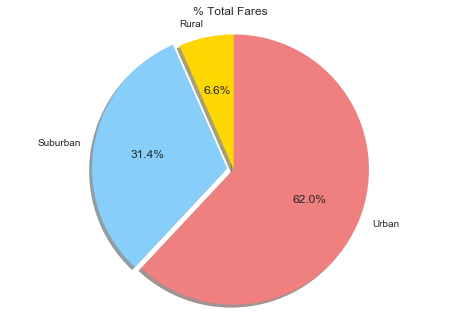

In [341]:
## Percent of Total Fares

fig = plt.figure()
ax = fig.add_subplot(111)

##going to use this for my labels
city_types = pyber_city_type_variables['type']

#colors and how far away to move each widget
colors = ["Gold", "lightskyblue", "lightcoral"]
explode = (0, 0.05, 0)

ax.set_title("% of Total Fares by City Type")
ax.pie(pyber_city_type_variables['% Total Fares'], labels=city_types,explode=explode, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=90)
ax.axis("equal")

plt.show()

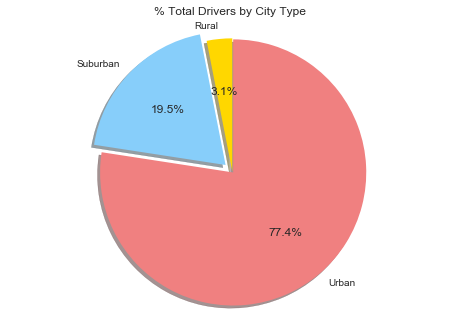

In [395]:
## Percent Total Drivers by city

fig = plt.figure()
ax = fig.add_subplot(111)

# use for the label
city_types = pyber_city_type_variables['type']

#colors and how far away to move each widget
colors = ["Gold", "lightskyblue", "lightcoral"]
explode = (0, 0.07, 0.01)

ax.set_title("% Total Drivers by City Type")
ax.pie(pyber_city_type_variables['% Total Drivers by City Type'],labels=city_types, explode=explode, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=90)
ax.axis("equal")

plt.show()

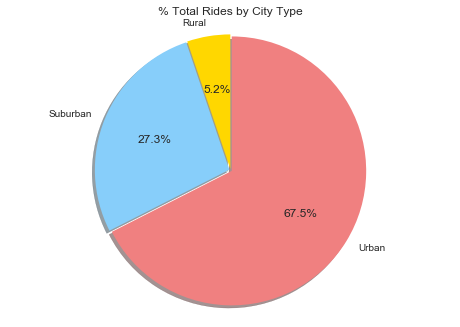

In [349]:
## Percent Total by City Type

fig = plt.figure()
ax = fig.add_subplot(111)

#gonna use for the label
city_types = pyber_city_type_variables['type']

#colors and how far away to move each widget
colors = ["Gold", "lightskyblue", "lightcoral"]
explode = (0.01, 0.01, 0.01)

ax.set_title("% of Total Rides by City Type")
ax.pie(pyber_city_type_variables['% Total Rides by City Type'],labels=city_types, colors=colors, explode=explode,
       autopct="%1.1f%%", shadow=True, startangle=90)
ax.axis("equal")

plt.show()

In [ ]:
# ##3 observations made from just looking at the data and what I would want to analyze more##

# 1. While there are less rides in general rural areas than urban. 
# Fares are still on par and in general look to be above average than the urban areas
# Though rural city types still make up a small percentage of the overall total combined fares of all city types.

#2. The suburban market seems to be quite lucrative for drivers. While the suburban city type makes up 27% of total rides and 31.4% of Total fares
## Only 19% of the total driver population drives in suburban cities areas while the average fare price looks to be slightly abover the urban average.

#3. Urban areas seem to be oversatturated by the amount of available drivers and suburban and rural areas need a bit more to meet demand.
##Urban areas made up 67.5% of total rides but also has 77.4% of drivers.
##Suburban areas made up 27.3% of total rides but also has 19.5% of drivers.
##Rural areas made up up 5.2% of total rides but also has 3.1% of drivers.